In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE

import warnings
warnings.filterwarnings("ignore")

In [42]:
c_data = pd.read_csv('../data/data_cleaned.csv')

#### Drop Categorical feature

In [43]:
f_data = c_data.drop('Liability-Assets_Flag', axis=1)

Seperate the data

In [44]:
X = f_data.drop('Bankrupt?', axis=1)
y = f_data['Bankrupt?']

#### Dealing with Imbalanced Dataset

Apply SMOTE(Synthetic Minority Oversampling Technique) to generate synthetic samples from minority class to imbalanced target class problem.

In [45]:
smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)
X_sm.shape, y_sm.shape

((13198, 93), (13198,))

In [46]:
y_sm.value_counts()

1    6599
0    6599
Name: Bankrupt?, dtype: int64

#### Logistic Regression
- Logistic Regression(Base)
- Logistic Regression(Hyperparameter tuning)

Logistic Regression Base model

0.6103535353535353
              precision    recall  f1-score   support

           0       0.59      0.73      0.65      2005
           1       0.64      0.49      0.55      1955

    accuracy                           0.61      3960
   macro avg       0.62      0.61      0.60      3960
weighted avg       0.62      0.61      0.60      3960



<AxesSubplot:>

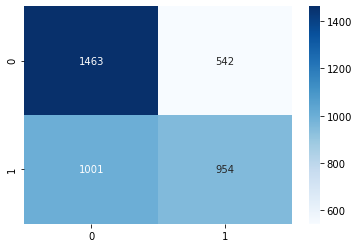

In [50]:
logreg = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size=0.30, random_state=42)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues',fmt='d')

Hyperparameter Tuning

In [51]:
steps = [('scaler',StandardScaler()),
        ('classifier', LogisticRegression())]
pipeline = Pipeline(steps)

params = {'classifier__C':[1.0,10,100,0.1,0.01],
         'classifier__penalty':['l2'],
         'classifier__solver':['lbfgs', 'liblinear']}

cv = GridSearchCV(pipeline, param_grid=params, cv=3)
cv.fit(X_train, y_train)

y_pred = cv.predict(X_test)
print("Best: %f using %s" % (cv.best_score_, cv.best_params_))

Best: 0.906906 using {'classifier__C': 1.0, 'classifier__penalty': 'l2', 'classifier__solver': 'lbfgs'}


In [52]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_sm)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_sm, test_size=0.30, random_state=42)

0.9065656565656566
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      2005
           1       0.90      0.92      0.91      1955

    accuracy                           0.91      3960
   macro avg       0.91      0.91      0.91      3960
weighted avg       0.91      0.91      0.91      3960



<AxesSubplot:>

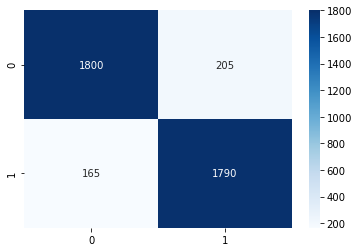

In [53]:
logreg_tuned=LogisticRegression(penalty='l2',C=1.0,solver='liblinear') 
logreg_tuned.fit(X_train, y_train)
y_pred = logreg_tuned.predict(X_test)

print(accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, cmap='Blues',fmt='d')

#### Comparing ROC Curve between the models

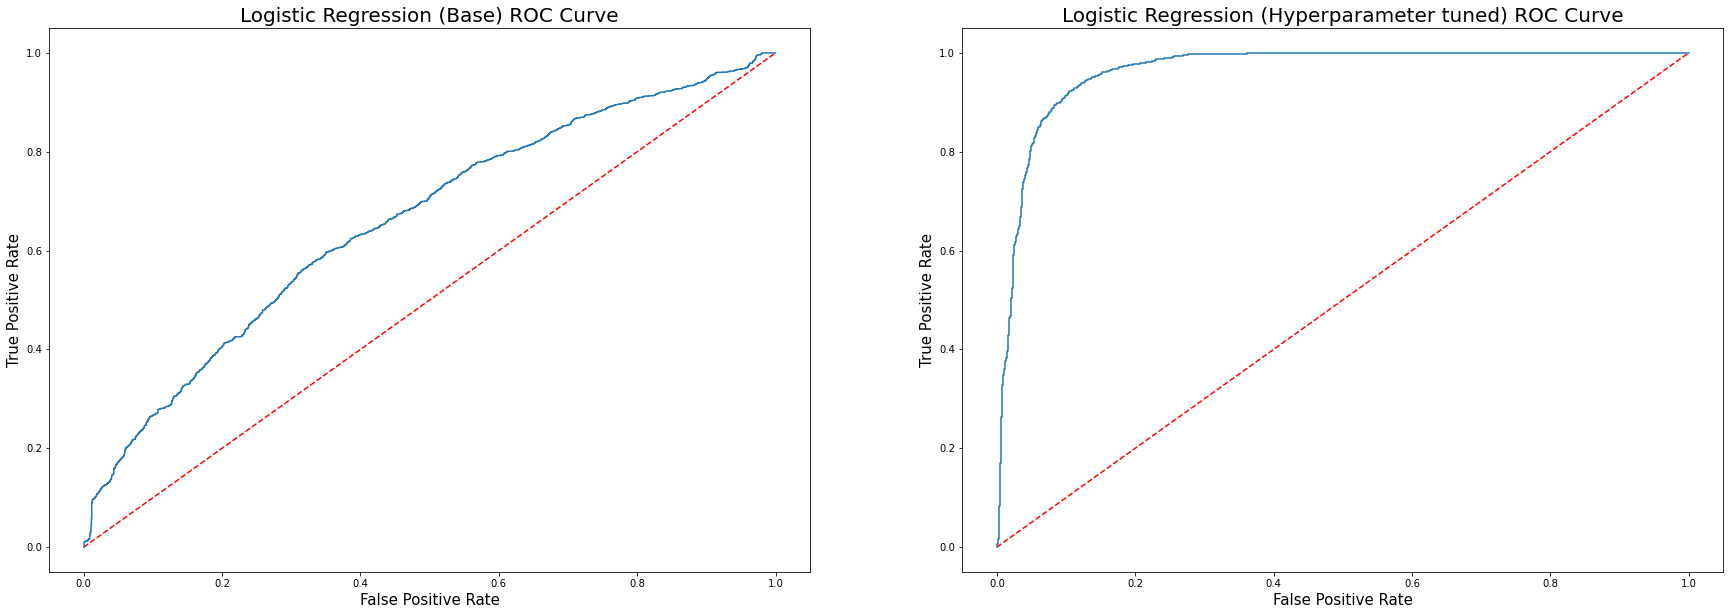

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(30,10))
y_pred_prob = logreg.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
ax1.plot([0,1],[0,1], 'r--')
ax1.plot(fpr,tpr,label='Logistic Regression')
ax1.set_xlabel('False Positive Rate',fontsize=15)
ax1.set_ylabel('True Positive Rate',fontsize=15)
ax1.set_title('Logistic Regression (Base) ROC Curve',fontsize=20)

y_pred_logtune = logreg_tuned.predict_proba(X_test)[:,1]
hp_fpr, hp_tpr, hp_thresholds =roc_curve(y_test, y_pred_logtune)
ax2.plot([0,1],[0,1], 'r--')
ax2.plot(hp_fpr,hp_tpr,label='Logistic Regression')
ax2.set_xlabel('False Positive Rate',fontsize=15)
ax2.set_ylabel('True Positive Rate',fontsize=15)
ax2.set_title('Logistic Regression (Hyperparameter tuned) ROC Curve', fontsize=20)
plt.show();

In [ ]:
'''
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
rf = RandomForestClassifier(n_estimators=50, max_depth=20, n_jobs=-1)
rf_model = rf.fit(X_train, y_train)
sorted(zip(rf_model.feature_importances_, X_train.columns),reverse=True)[0:10]
'''